<a href="https://colab.research.google.com/github/feicccccccc/colab_sandbox/blob/master/MNIST_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A test to use colab to perform MNIST training using pure numpy operation

This notebook is base on many resource:
1. Andrew Ng DL course
2. deeplearning online tutorial / book

And implement and document in my own way  ;)
Targeting for easy understanidng with only high school knowledge:


1.   Basic differentiation
2.   Basci linear algebra (basically matrics)



## First step: Import library including


1.   Numpy
2.   keras ( to import the training set and testing set)
3.   matplotlib ( for ploting the image)



In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

### Get the MNIST data set from keras default dataloader

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Show part of the data set in term of pixel map and there output y

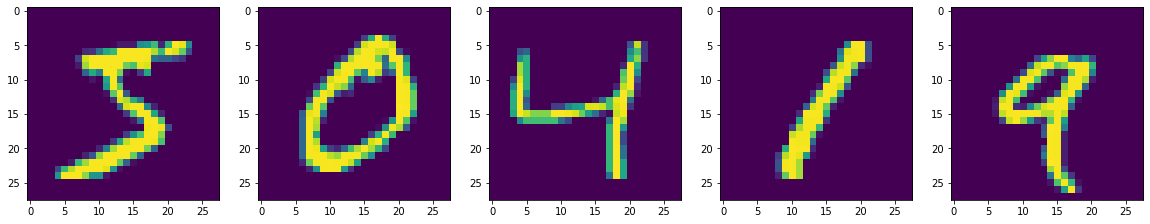

In [24]:
images=[x_train[0,:],x_train[1,:],x_train[2,:],x_train[3,:],x_train[4,:]]

plt.figure(figsize=(20,10))
columns =5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [25]:
print("First label  = ", y_train[0])
print("Second Label = ", y_train[1])
print("Third label  = ", y_train[2])
print("Forth label  = ", y_train[3])
print("Fifth label  = ", y_train[4])

First label  =  5
Second Label =  0
Third label  =  4
Forth label  =  1
Fifth label  =  9


### Data pre processing
#### Flattern and Normalise the raw data
#### Make sure the dimension best suit our convention

In [26]:
m_train = x_train.shape[0] # total number of data in training set
m_test = x_test.shape[0] # total number of data in test set
flattern_dim = x_train.shape[1]*x_train.shape[2] # input dimension: 28 x 28 = 784
print(m_train,m_test,flattern_dim)

60000 10000 784


In [0]:
x_train = x_train.reshape((m_train,flattern_dim)).T
x_train = x_train / 255
x_test = x_test.reshape((m_test,flattern_dim)).T
x_test = x_test / 255

In [28]:
print(x_train.shape) # Input dimension , number of data
print(x_train.shape)

(784, 60000)
(784, 60000)


#### Convert output lable to one_hot vector, comparable to our NN model
#### each entry will be the probability of the corresponding class (digit)

In [0]:
y_train = np.eye(10)[y_train].T
y_test = np.eye(10)[y_test].T

In [30]:
print(y_train.shape) # number of class, number of data
print(y_train[:,0]) # Original: 5

(10, 60000)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Define the network and network parameters

Input feature vector : 28 x 28 = 784 dimension vector

Hidden Layer = 32 neuron in hidden layer

>Activation: sigmoided

Output Layer = 10 neuron (class)

>Activation: softmax




## Let's first define the parameters of the neuron network

I will first create a dictatorary to store the parameters.

In [0]:
parameters = {}

# Gaussain disctrubtion with mean 0 and variance 1
w1 = np.random.randn(32,784)
b1 = np.zeros((32,1))
w2 = np.random.randn(10,32)
b2 = np.zeros((10,1))

### Activation function

In [0]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))
def softmax(z):
  return np.exp(z) / np.sum(np.exp(z), axis=0, keepdims=True)

### Hyper Parameter

In [0]:
num_iter = 1000
learning_rate = 0.5

### Training

In [34]:
for i in range(0,num_iter):

  # Forward propagation
  z1 = np.dot(w1,x_train) + b1
  a1 = sigmoid(z1)
  z2 = np.dot(w2,a1) + b2
  a2 = softmax(z2)

  # Loss
  # multiclass cross entropy loss
  loss = -1 * np.multiply(y_train, np.log(a2))
  cost = np.sum(loss) / m_train

  if(num_iter % 1 == 0):
    print("iteration : {}".format(i),end=" ")
    print("Current training loss = {}".format(cost))

  # Backward propagation
  
  # dSoftmax
  dz2 = a2 - y_train
  dw2 = (1. / m_train) * np.dot(dz2,a1.T)
  db2 = (1. / m_train) * np.sum(dz2,axis=1,keepdims=True)
  da1 = np.dot(w2.T,dz2)

  # dSigmoid
  dz1 = da1 * np.multiply(a1,1-a1)
  dw1 = (1. / m_train) * np.dot(dz1,x_train.T)
  db1 = (1. / m_train) * np.sum(dz1,axis=1,keepdims=True)

  # Batch gradient descent
  w1 = w1 - learning_rate * dw1
  b1 = b1 - learning_rate * db1
  w2 = w2 - learning_rate * dw2
  b2 = b2 - learning_rate * db2

iteration : 0 Current training loss = 7.573323418808963
iteration : 1 Current training loss = 6.3173700192097275
iteration : 2 Current training loss = 5.648786918200045
iteration : 3 Current training loss = 5.160197488862914
iteration : 4 Current training loss = 4.722178819516614
iteration : 5 Current training loss = 4.339173973233745
iteration : 6 Current training loss = 4.0318801751149325
iteration : 7 Current training loss = 3.8046401359641795
iteration : 8 Current training loss = 3.638835732218321
iteration : 9 Current training loss = 3.5092281705346937
iteration : 10 Current training loss = 3.398311954069526
iteration : 11 Current training loss = 3.2974741629830633
iteration : 12 Current training loss = 3.2032547415871058
iteration : 13 Current training loss = 3.1143834432199444
iteration : 14 Current training loss = 3.0303384319211912
iteration : 15 Current training loss = 2.950813086090986
iteration : 16 Current training loss = 2.8755539098055163
iteration : 17 Current training 

## Test model performance

#### Get the desired label base on the highest probability

In [0]:
def predict(output):
  temp1 = (np.argmax(output, axis=0)) # get the largest element along col
  temp3 = np.eye(10)[temp1] # create one_hot vector
  return temp3.T

In [39]:
result = predict(a2)
corr = 0
for i in range(m_train):
  if np.array_equal(result[:,i],y_train[:,i]):
    corr = corr + 1
print("Correctness in training set",corr/m_train)

Correctness Percentage  0.8539


In [0]:
def forward(input):
  z1 = np.dot(w1,input) + b1
  a1 = sigmoid(z1)
  z2 = np.dot(w2,a1) + b2
  a2 = softmax(z2)
  return a2

In [0]:
test = forward(x_test)
prediction = predict(test)

In [52]:
corr = 0
for i in range(m_test):
  if np.array_equal(prediction[:,i],y_test[:,i]):
    corr = corr + 1
print("Correctness in test set",corr/m_test)

Correctness in test set 0.8568


## input Example:

NN output =  [1.38412896e-05 8.46216180e-02 3.03463373e-03 7.73707606e-02
 1.49982270e-03 5.35822184e-03 3.43227104e-06 7.23519316e-01
 1.84116310e-02 8.61667227e-02]
Model output =  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The input character =  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


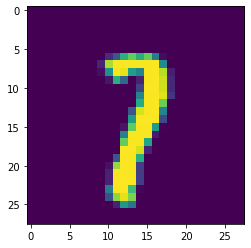

In [55]:
sample_idx = 111

image = x_test[:,sample_idx].reshape((28,28))

plt.imshow(image)

print("NN output = ", test[:,sample_idx])
print("Model output = ", prediction[:,sample_idx])

print("The input character = ", y_test[:,sample_idx])

# Try upload your own image and test the NN

### you can create the image in the follwing websit: 

http://kleki.com

Please use a larger brush or the storke will disappear after resize. (around 75)

The follwing code will automatically resize the image and fed it into the network for prediction

In [59]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 2019_12_08_Kleki (1).png to 2019_12_08_Kleki (1).png
User uploaded file "2019_12_08_Kleki (1).png" with length 34765 bytes


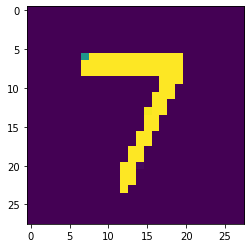

Model output =  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]


In [60]:
import cv2

def inverse_color(image):

    height,width = image.shape
    img2 = image.copy()

    for i in range(height):
        for j in range(width):
            img2[i,j] = (255-image[i,j]) 
    return img2

img = cv2.imread(fn)
resized_img = cv2.resize(img, (28, 28))
gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
gray = inverse_color(gray)

plt.imshow(gray)
plt.show()

normalised_img = gray / 255
input_img = normalised_img.reshape((28*28,1))

predict_user = forward(input_img)

print("Model output = ", predict(predict_user))
